<a href="https://colab.research.google.com/github/gs23170/EFIMM0141_2407168/blob/main/EFIMM0141_2407168.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Importing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts

uni = pd.read_csv('/content/drive/MyDrive/DA in Business Project/World University Rankings 2023 (1).csv')
uni.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


## Data Wrangling and Pre-Processing

In [3]:
# Checking for Null Values
uni.isna().sum()

University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64

In [4]:
# Removing Rows out of consideration with no University Name
uni.dropna(subset=['Name of University'], inplace=True)
uni.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [5]:
# Filling Null values in Location according to the geopy function
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Assuming 'uni' is your DataFrame
# Replace 'Name of University' and 'Location' with your actual column names

geolocator = Nominatim(user_agent="my_geocoder", timeout=10)

def geocode_with_timeout(location):
    try:
        result = geolocator.geocode(location)
        return result.address.split(",")[-1].strip() if result else 'Unknown'
    except GeocoderTimedOut:
        return geocode_with_timeout(location)

# Replace NaN values in 'Location' based on 'Name of University'
uni['Location'] = uni.apply(lambda row: geocode_with_timeout(row['Name of University'])
                              if pd.isna(row['Location']) else row['Location'], axis=1)

In [6]:
# Splitting Male and Female Ratio
uni[['Female', 'Male']] = uni['Female:Male Ratio'].str.split(' : ', expand=True)
uni.drop('Female:Male Ratio', axis = 1, inplace = True)
uni['Female'] = pd.to_numeric(uni['Female'], errors='coerce')
uni['Male'] = pd.to_numeric(uni['Male'], errors='coerce')
uni.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female,Male
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,96.4,92.3,99.7,99.0,74.9,96.2,48.0,52.0
1,2,Harvard University,United States,"21,887",9.6,25%,95.2,94.8,99.0,99.3,49.5,80.5,50.0,50.0
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,94.8,90.9,99.5,97.0,54.2,95.8,47.0,53.0
3,3,Stanford University,United States,"16,164",7.1,24%,94.8,94.2,96.7,99.8,65.0,79.8,46.0,54.0
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,94.2,90.7,93.6,99.8,90.9,89.3,40.0,60.0


In [7]:
# Removing the % sign from the International Student Column and scaling it between 0-1
uni['International Student'] = uni['International Student'].replace({'%': ''}, regex=True)
uni['International Student'] = uni['International Student'].apply(lambda x: float(x) / 100 if x != '' else np.nan)
uni.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female,Male
0,1,University of Oxford,United Kingdom,"20,965",10.6,0.42,96.4,92.3,99.7,99.0,74.9,96.2,48.0,52.0
1,2,Harvard University,United States,"21,887",9.6,0.25,95.2,94.8,99.0,99.3,49.5,80.5,50.0,50.0
2,3,University of Cambridge,United Kingdom,"20,185",11.3,0.39,94.8,90.9,99.5,97.0,54.2,95.8,47.0,53.0
3,3,Stanford University,United States,"16,164",7.1,0.24,94.8,94.2,96.7,99.8,65.0,79.8,46.0,54.0
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,0.33,94.2,90.7,93.6,99.8,90.9,89.3,40.0,60.0


In [8]:
# Overall Score has a range in some rows so taking the maximum score for all these as they all represent the same range of scores
def return_max(score):
    if isinstance(score, str):
        if '–' in score:
            score = score.replace('–', '-')
            split_values = score.split('-')
            max_val = float(split_values[-1])
            return max_val
        else:
            return float(score)
    else:
        return score
uni['OverAll Score'] = uni['OverAll Score'].apply(return_max)

In [9]:
# Converting Number of Students Column to Numeric
uni['No of student'] = uni['No of student'].replace({',':''}, regex = True)
uni['No of student'] = pd.to_numeric(uni['No of student'], errors='coerce')

In [10]:
# Replacing all other NaN values with their respective column mean
avgcolumns = ['No of student', 'International Student', 'Female', 'Male', 'OverAll Score', 'No of student per staff',
              'Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']
uni[avgcolumns] = uni[avgcolumns].fillna(uni[avgcolumns].mean(numeric_only=True))
uni.isna().sum()

University Rank                0
Name of University             0
Location                       0
No of student                  0
No of student per staff        0
International Student          0
OverAll Score                  0
Teaching Score                 0
Research Score                 0
Citations Score                0
Industry Income Score          0
International Outlook Score    0
Female                         0
Male                           0
dtype: int64

In [11]:
len(uni)

2233

In [12]:
uni['No of Internation Students'] = uni['International Student']*uni['No of student']
uni.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female,Male,No of Internation Students
0,1,University of Oxford,United Kingdom,20965.0,10.6,0.42,96.4,92.3,99.7,99.0,74.9,96.2,48.0,52.0,8805.30
1,2,Harvard University,United States,21887.0,9.6,0.25,95.2,94.8,99.0,99.3,49.5,80.5,50.0,50.0,5471.75
2,3,University of Cambridge,United Kingdom,20185.0,11.3,0.39,94.8,90.9,99.5,97.0,54.2,95.8,47.0,53.0,7872.15
3,3,Stanford University,United States,16164.0,7.1,0.24,94.8,94.2,96.7,99.8,65.0,79.8,46.0,54.0,3879.36
4,5,Massachusetts Institute of Technology,United States,11415.0,8.2,0.33,94.2,90.7,93.6,99.8,90.9,89.3,40.0,60.0,3766.95


## Exploratory Data Analysis

In [13]:
# # Locations with Top 15 universities and their counts
import geopandas as gpd
import time
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geolocator = Nominatim(user_agent="my_geocoder", timeout=10)

def batch_geocode(locations):
    results = {}
    for location in locations:
        try:
            result = geolocator.geocode(location)
            results[location] = (result.latitude, result.longitude) if result else None
        except Exception as e:
            print(f"Error geocoding {location}: {e}")
            results[location] = None
        time.sleep(1)
    return results

uni_locations = uni['Location'].unique()
location_results = batch_geocode(uni_locations)
uni['Latitude'] = uni['Location'].map(lambda x: location_results.get(x, None))
uni[['Latitude', 'Longitude']] = pd.DataFrame(uni['Latitude'].tolist(), index=uni.index)
gdf_uni = gpd.GeoDataFrame(uni, geometry=gpd.points_from_xy(uni['Longitude'], uni['Latitude']))
gdf = world.merge(gdf_uni, left_on='name', right_on='Location')
uni_sorted = uni.sort_values('OverAll Score', ascending=False)
top_50 = uni_sorted.head(50)
mean_latitude_top_50 = top_50['Latitude'].mean()
mean_longitude_top_50 = top_50['Longitude'].mean()
m_top_50 = folium.Map(location=[mean_latitude_top_50, mean_longitude_top_50], zoom_start=5)
marker_cluster = MarkerCluster().add_to(m_top_50)

for idx, row in top_50.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Name of University']).add_to(marker_cluster)

m_top_50

<ipython-input-13-84e0a535f0a2>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


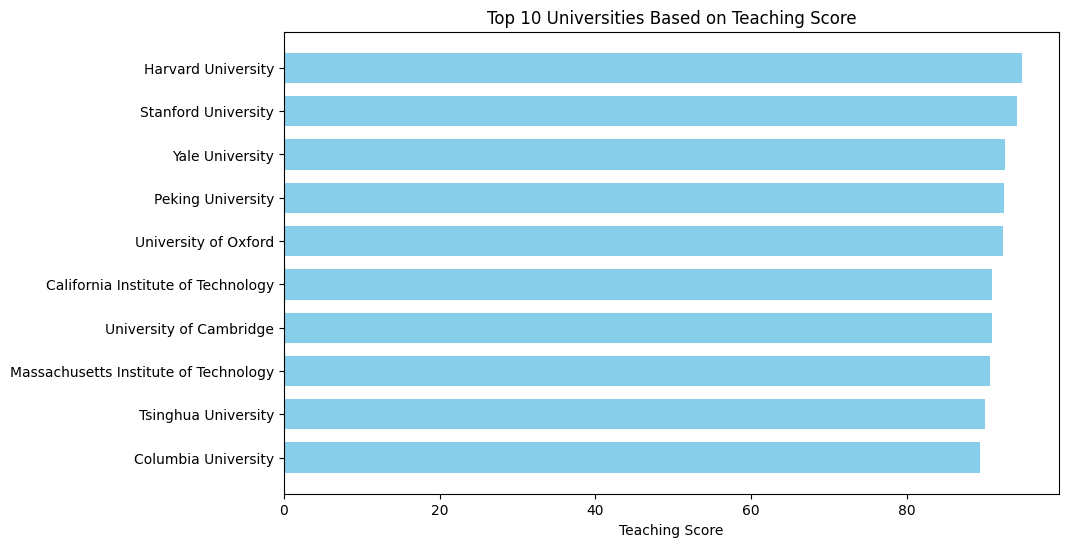

,Name of University,Teaching Score
1,Harvard University,94.8
3,Stanford University,94.2
8,Yale University,92.6
16,Peking University,92.5
0,University of Oxford,92.3
5,California Institute of Technology,90.9
2,University of Cambridge,90.9
4,Massachusetts Institute of Technology,90.7
15,Tsinghua University,90.1
10,Columbia University,89.4


In [14]:
# Top 10 Universities for Teaching Score
uni_sorted_teaching = uni.sort_values('Teaching Score', ascending=False)
top_10_teaching = uni_sorted_teaching.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_teaching['Name of University'], top_10_teaching['Teaching Score'], color='skyblue', height=0.7)
plt.xlabel('Teaching Score')
plt.title('Top 10 Universities Based on Teaching Score')
plt.gca().invert_yaxis()
plt.show()
top_10_teaching[['Name of University','Teaching Score']].head(10)

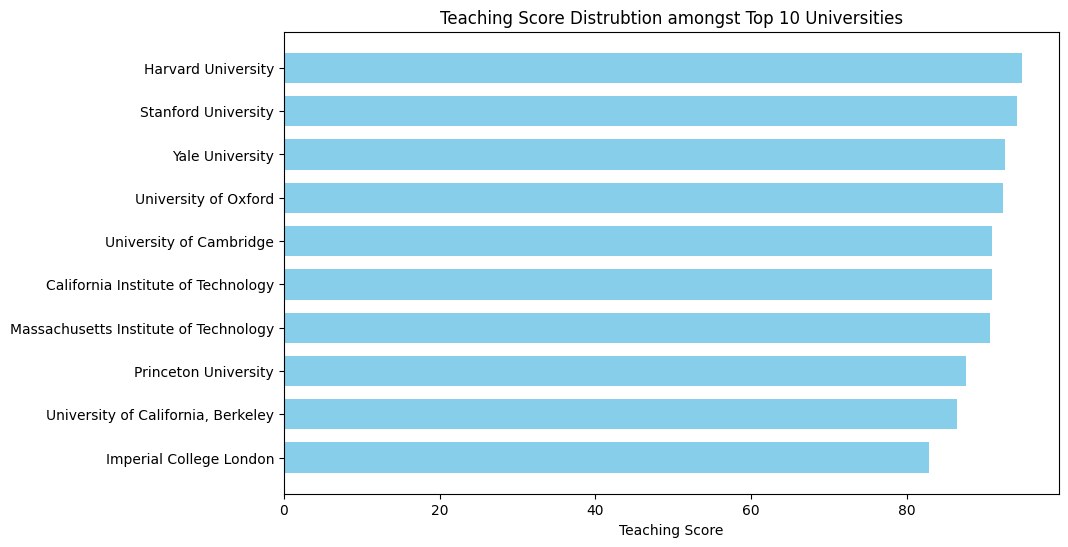

,Name of University,Teaching Score
1,Harvard University,94.8
3,Stanford University,94.2
8,Yale University,92.6
0,University of Oxford,92.3
2,University of Cambridge,90.9
5,California Institute of Technology,90.9
4,Massachusetts Institute of Technology,90.7
6,Princeton University,87.6
7,"University of California, Berkeley",86.4
9,Imperial College London,82.8


In [15]:
# Teaching Score Distribution amongst the top 10 Universities (Direct Competition)
uni_sorted_teaching_score = uni.head(10)
top_10_teaching_score = uni_sorted_teaching_score.sort_values(by='Teaching Score', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(top_10_teaching_score['Name of University'], top_10_teaching_score['Teaching Score'], color='skyblue', height=0.7)
plt.xlabel('Teaching Score')
plt.title('Teaching Score Distrubtion amongst Top 10 Universities')
plt.gca().invert_yaxis()
plt.show()
top_10_teaching_score[['Name of University','Teaching Score']].head(10)

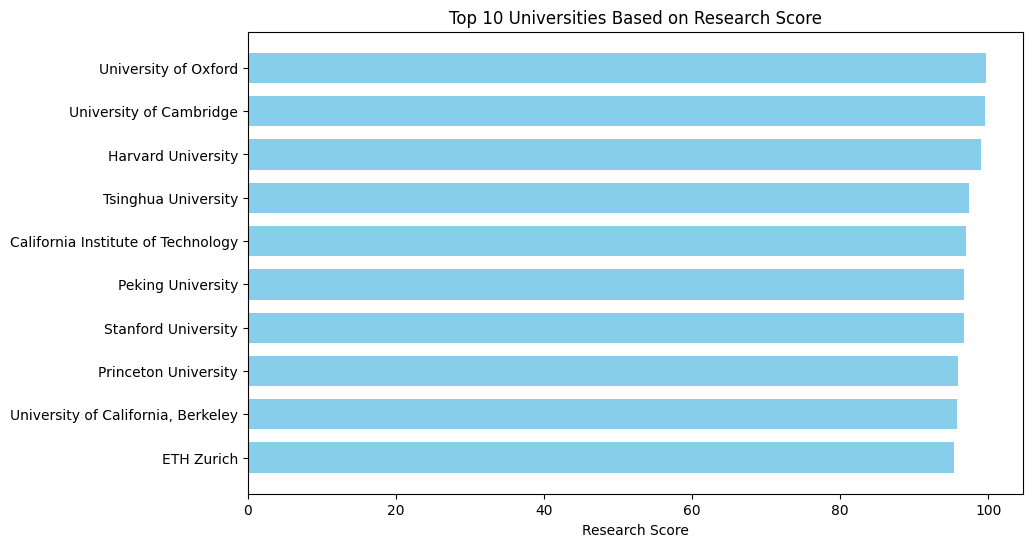

,Name of University,Research Score
0,University of Oxford,99.7
2,University of Cambridge,99.5
1,Harvard University,99.0
15,Tsinghua University,97.4
5,California Institute of Technology,97.0
16,Peking University,96.7
3,Stanford University,96.7
6,Princeton University,95.9
7,"University of California, Berkeley",95.8
11,ETH Zurich,95.4


In [16]:
# Top 10 Universities for Research Score
uni_sorted_research = uni.sort_values('Research Score', ascending=False)
top_10_research = uni_sorted_research.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_research['Name of University'], top_10_research['Research Score'], color='skyblue', height=0.7)
plt.xlabel('Research Score')
plt.title('Top 10 Universities Based on Research Score')
plt.gca().invert_yaxis()
plt.show()
top_10_research[['Name of University','Research Score']].head(10)

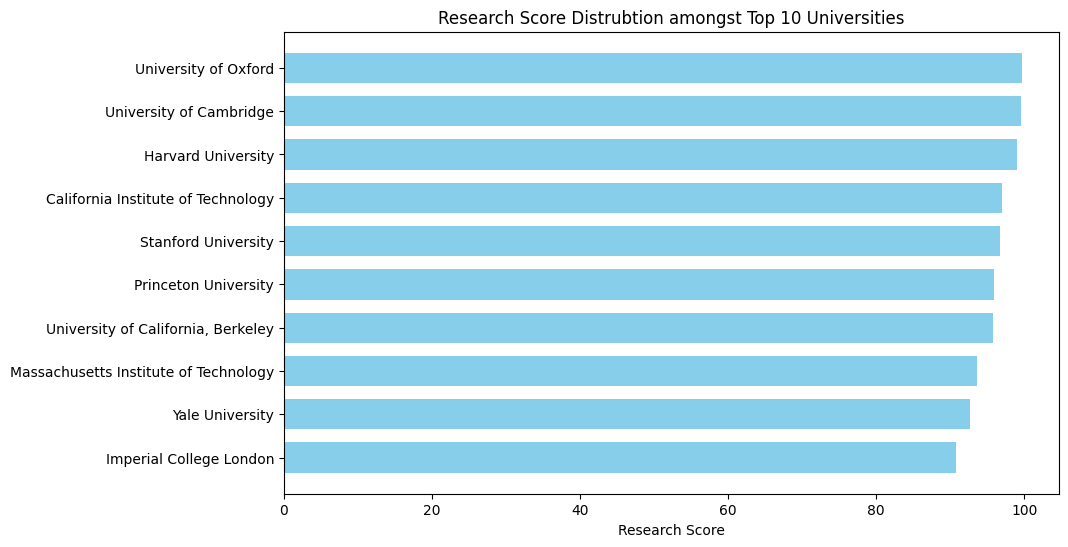

,Name of University,Research Score
0,University of Oxford,99.7
2,University of Cambridge,99.5
1,Harvard University,99.0
5,California Institute of Technology,97.0
3,Stanford University,96.7
6,Princeton University,95.9
7,"University of California, Berkeley",95.8
4,Massachusetts Institute of Technology,93.6
8,Yale University,92.7
9,Imperial College London,90.8


In [17]:
# Research Score Distribution amongst the top 10 Universities (Direct Competition)
uni_sorted_research_score = uni.head(10)
top_10_research_score = uni_sorted_research_score.sort_values(by='Research Score', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(top_10_research_score['Name of University'], top_10_research_score['Research Score'], color='skyblue', height=0.7)
plt.xlabel('Research Score')
plt.title('Research Score Distrubtion amongst Top 10 Universities')
plt.gca().invert_yaxis()
plt.show()
top_10_research_score[['Name of University','Research Score']].head(10)

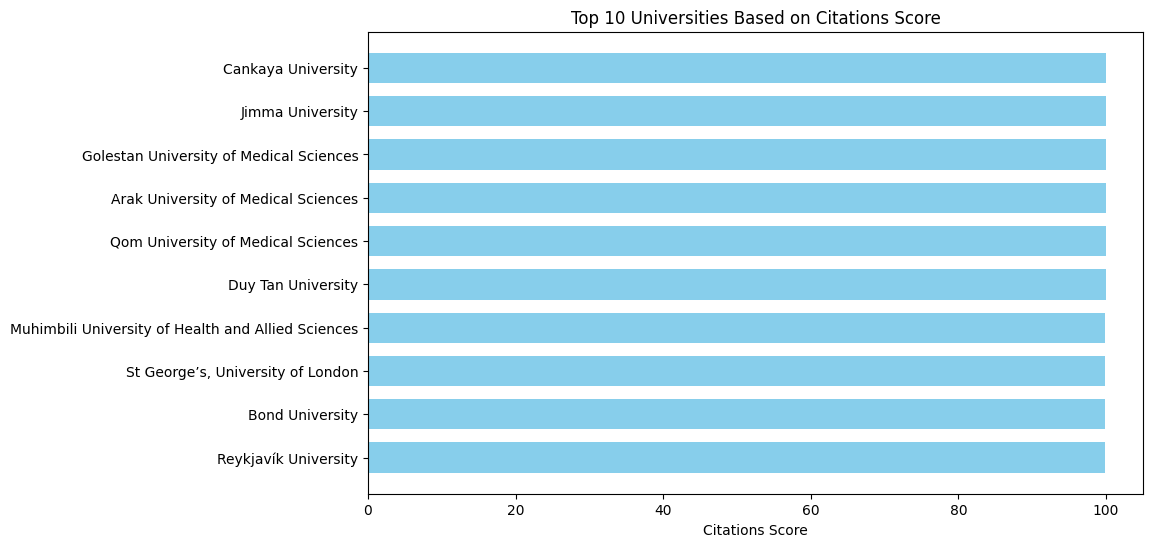

,Name of University,Citations Score
408,Cankaya University,100.0
535,Jimma University,100.0
361,Golestan University of Medical Sciences,100.0
399,Arak University of Medical Sciences,100.0
469,Qom University of Medical Sciences,100.0
419,Duy Tan University,100.0
454,Muhimbili University of Health and Allied Scie...,99.9
228,"St George’s, University of London",99.9
253,Bond University,99.9
329,Reykjavík University,99.9


In [18]:
# Top 10 Universities for Citations Score
uni_sorted_citations = uni.sort_values('Citations Score', ascending=False)
top_10_citations = uni_sorted_citations.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_citations['Name of University'], top_10_citations['Citations Score'], color='skyblue', height=0.7)
plt.xlabel('Citations Score')
plt.title('Top 10 Universities Based on Citations Score')
plt.gca().invert_yaxis()
plt.show()
top_10_citations[['Name of University','Citations Score']].head(10)

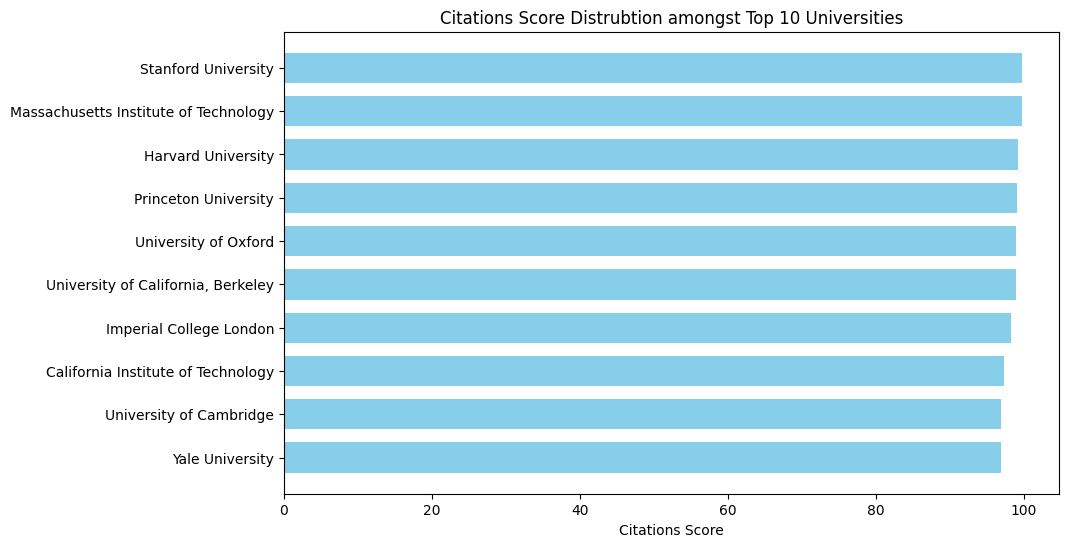

,Name of University,Citations Score
3,Stanford University,99.8
4,Massachusetts Institute of Technology,99.8
1,Harvard University,99.3
6,Princeton University,99.1
0,University of Oxford,99.0
7,"University of California, Berkeley",99.0
9,Imperial College London,98.3
5,California Institute of Technology,97.3
2,University of Cambridge,97.0
8,Yale University,97.0


In [19]:
# Citations Score Distribution amongst the top 10 Universities (Direct Competition)
uni_sorted_citations_score = uni.head(10)
top_10_citations_score = uni_sorted_citations_score.sort_values(by='Citations Score', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(top_10_citations_score['Name of University'], top_10_citations_score['Citations Score'], color='skyblue', height=0.7)
plt.xlabel('Citations Score')
plt.title('Citations Score Distrubtion amongst Top 10 Universities')
plt.gca().invert_yaxis()
plt.show()
top_10_citations_score[['Name of University','Citations Score']].head(10)

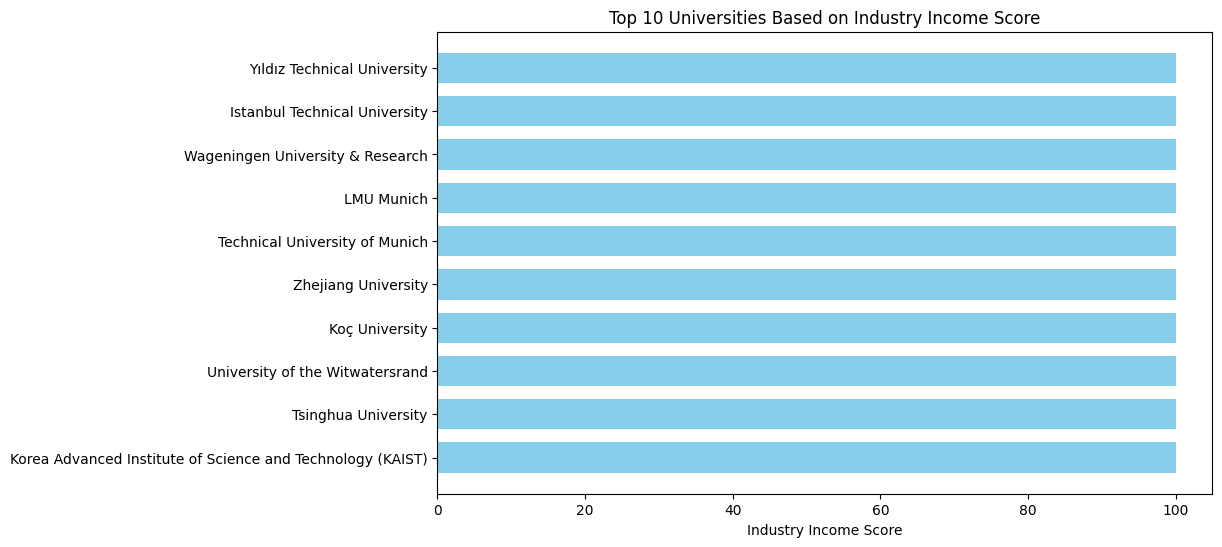

,Name of University,Industry Income Score
1153,Yıldız Technical University,100.0
675,Istanbul Technical University,100.0
58,Wageningen University & Research,100.0
32,LMU Munich,100.0
29,Technical University of Munich,100.0
66,Zhejiang University,100.0
442,Koç University,100.0
298,University of the Witwatersrand,100.0
15,Tsinghua University,100.0
91,Korea Advanced Institute of Science and Techno...,100.0


In [20]:
# Top 10 Universities for Industry Income Score
uni_sorted_industry = uni.sort_values('Industry Income Score', ascending=False)
top_10_industry = uni_sorted_industry.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_industry['Name of University'], top_10_industry['Industry Income Score'], color='skyblue', height=0.7)
plt.xlabel('Industry Income Score')
plt.title('Top 10 Universities Based on Industry Income Score')
plt.gca().invert_yaxis()
plt.show()
top_10_industry[['Name of University','Industry Income Score']].head(10)

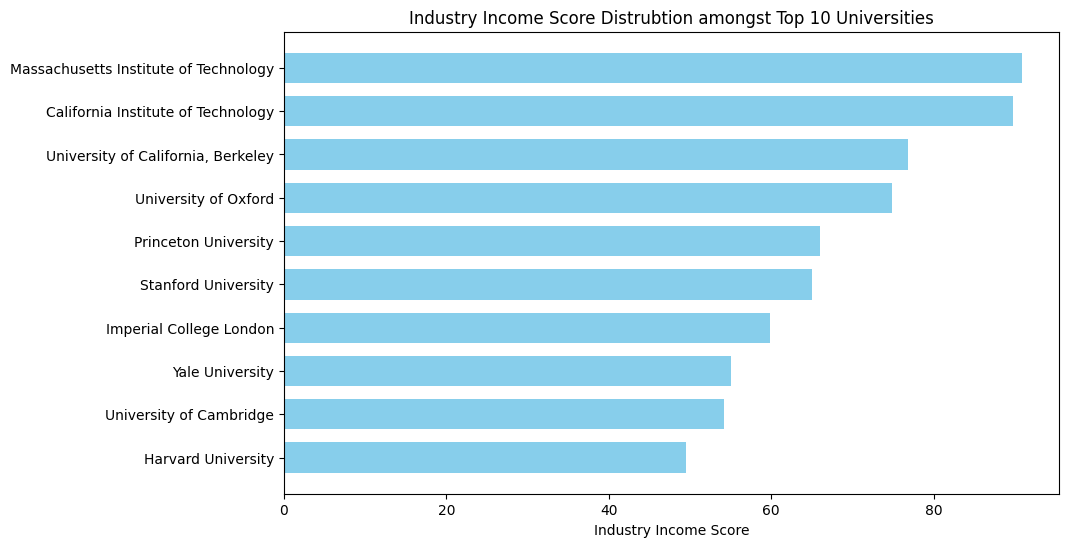

,Name of University,Industry Income Score
4,Massachusetts Institute of Technology,90.9
5,California Institute of Technology,89.8
7,"University of California, Berkeley",76.8
0,University of Oxford,74.9
6,Princeton University,66.0
3,Stanford University,65.0
9,Imperial College London,59.8
8,Yale University,55.0
2,University of Cambridge,54.2
1,Harvard University,49.5


In [21]:
# Industry Income Score Distribution amongst the top 10 Universities (Direct Competition)
uni_sorted_industry_score = uni.head(10)
top_10_industry_score = uni_sorted_industry_score.sort_values(by='Industry Income Score', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(top_10_industry_score['Name of University'], top_10_industry_score['Industry Income Score'], color='skyblue', height=0.7)
plt.xlabel('Industry Income Score')
plt.title('Industry Income Score Distrubtion amongst Top 10 Universities')
plt.gca().invert_yaxis()
plt.show()
top_10_industry_score[['Name of University','Industry Income Score']].head(10)

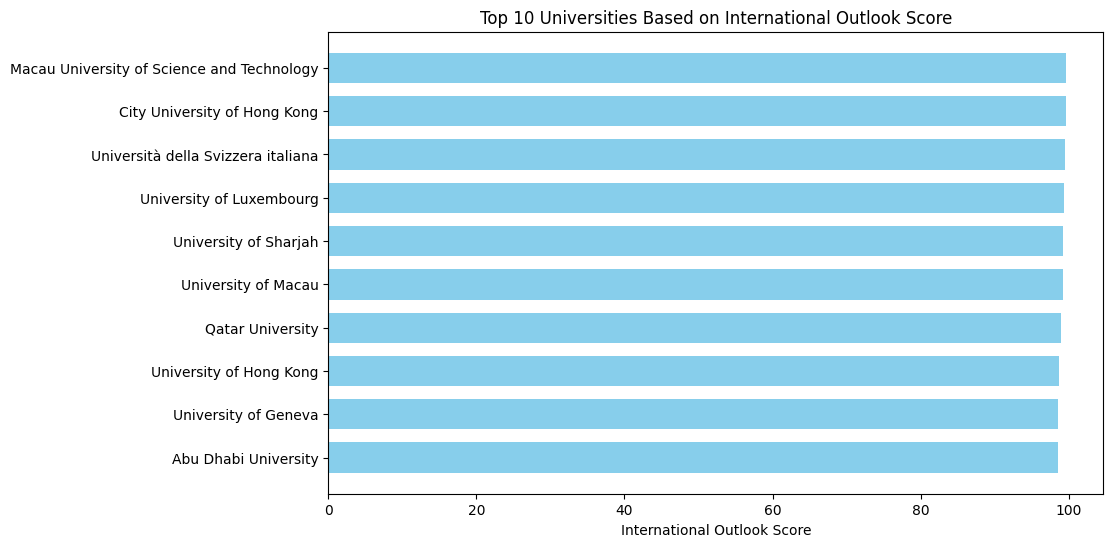

,Name of University,International Outlook Score
218,Macau University of Science and Technology,99.7
98,City University of Hong Kong,99.6
237,Università della Svizzera italiana,99.5
216,University of Luxembourg,99.4
286,University of Sharjah,99.3
217,University of Macau,99.3
224,Qatar University,98.9
30,University of Hong Kong,98.7
207,University of Geneva,98.6
299,Abu Dhabi University,98.5


In [22]:
# Top 10 Universities for International Outlook Score
uni_sorted_outlook = uni.sort_values('International Outlook Score', ascending=False)
top_10_outlook = uni_sorted_outlook.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_outlook['Name of University'], top_10_outlook['International Outlook Score'], color='skyblue', height=0.7)
plt.xlabel('International Outlook Score')
plt.title('Top 10 Universities Based on International Outlook Score')
plt.gca().invert_yaxis()
plt.show()
top_10_outlook[['Name of University','International Outlook Score']].head(10)

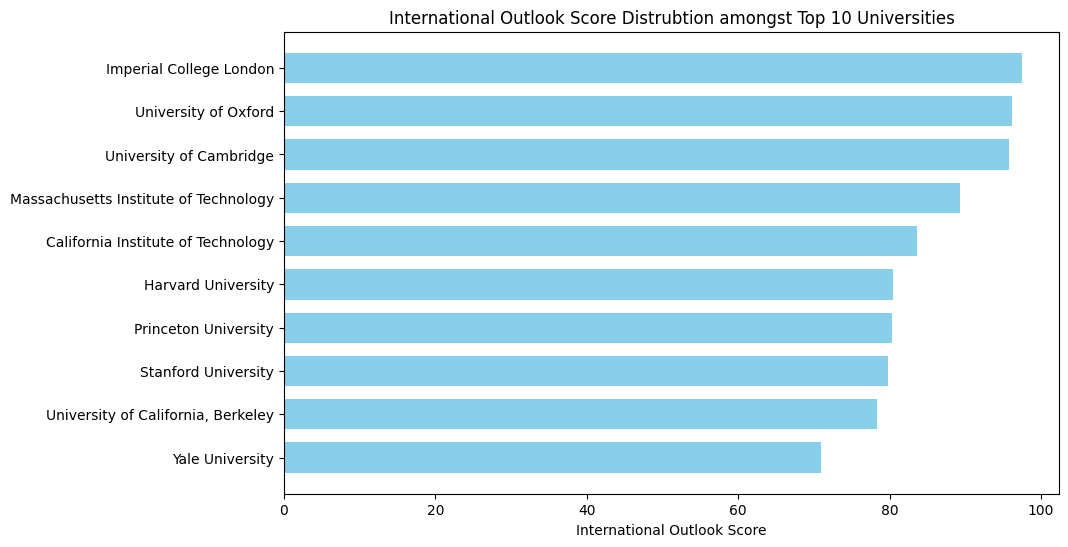

,Name of University,International Outlook Score
9,Imperial College London,97.5
0,University of Oxford,96.2
2,University of Cambridge,95.8
4,Massachusetts Institute of Technology,89.3
5,California Institute of Technology,83.6
1,Harvard University,80.5
6,Princeton University,80.3
3,Stanford University,79.8
7,"University of California, Berkeley",78.4
8,Yale University,70.9


In [23]:
# International Outlook Score Distribution amongst the top 10 Universities (Direct Competition)
uni_sorted_outlook_score = uni.head(10)
top_10_outlook_score = uni_sorted_outlook_score.sort_values(by='International Outlook Score', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(top_10_outlook_score['Name of University'], top_10_outlook_score['International Outlook Score'], color='skyblue', height=0.7)
plt.xlabel('International Outlook Score')
plt.title('International Outlook Score Distrubtion amongst Top 10 Universities')
plt.gca().invert_yaxis()
plt.show()
top_10_outlook_score[['Name of University','International Outlook Score']].head(10)

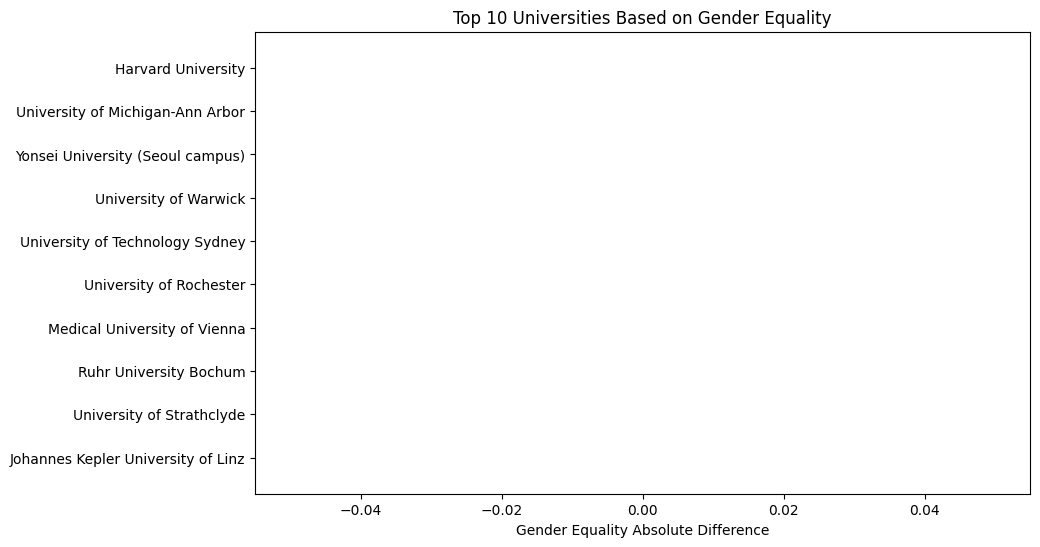

,Name of University,Male
1,Harvard University,50.0
22,University of Michigan-Ann Arbor,50.0
77,Yonsei University (Seoul campus),50.0
104,University of Warwick,50.0
132,University of Technology Sydney,50.0
153,University of Rochester,50.0
192,Medical University of Vienna,50.0
284,Ruhr University Bochum,50.0
479,University of Strathclyde,50.0
536,Johannes Kepler University of Linz,50.0


In [24]:
# Top 10 Universities for Gender Equality
#abs Male column is the deviation from the perfect equality index of 50
uni['abs Male'] = abs(uni['Male'] - 50)
uni_sorted_gender = uni.sort_values(by=['abs Male', 'OverAll Score'], ascending=[True, False])
top_10_gender = uni_sorted_gender.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_gender['Name of University'], top_10_gender['abs Male'], color='skyblue', height=0.7)
plt.xlabel('Gender Equality Absolute Difference')
plt.title('Top 10 Universities Based on Gender Equality')
plt.gca().invert_yaxis()
plt.show()
top_10_gender[['Name of University','Male']].head(10)

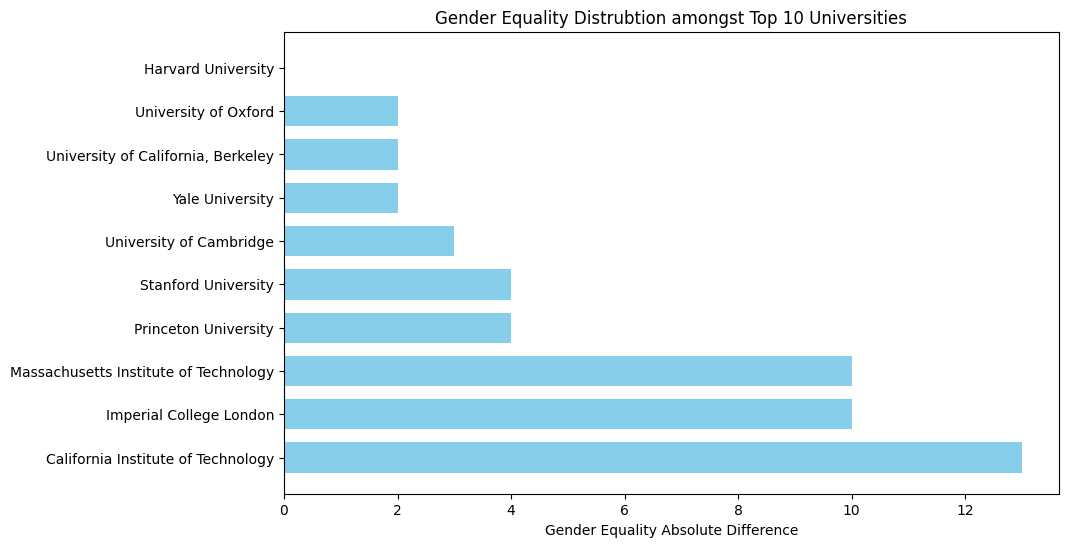

,Name of University,Male
1,Harvard University,50.0
0,University of Oxford,52.0
7,"University of California, Berkeley",48.0
8,Yale University,48.0
2,University of Cambridge,53.0
3,Stanford University,54.0
6,Princeton University,54.0
4,Massachusetts Institute of Technology,60.0
9,Imperial College London,60.0
5,California Institute of Technology,63.0


In [25]:
# Gender Equality Distribution amongst the top 10 Universities (Direct Competition)
uni_sorted_gender_score = uni.head(10)
top_10_gender_score = uni_sorted_gender_score.sort_values(by=['abs Male', 'OverAll Score'], ascending=[True, False])
plt.figure(figsize=(10, 6))
plt.barh(top_10_gender_score['Name of University'], top_10_gender_score['abs Male'], color='skyblue', height=0.7)
plt.xlabel('Gender Equality Absolute Difference')
plt.title('Gender Equality Distrubtion amongst Top 10 Universities')
plt.gca().invert_yaxis()
plt.show()
top_10_gender_score[['Name of University','Male']].head(10)

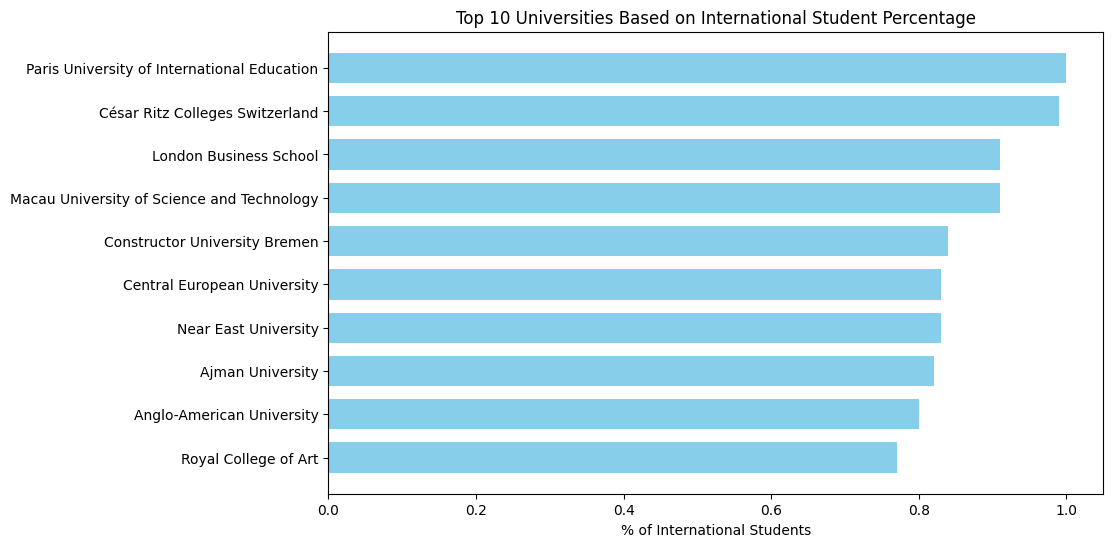

,Name of University,International Student
2052,Paris University of International Education,1.00
1798,César Ritz Colleges Switzerland,0.99
1968,London Business School,0.91
218,Macau University of Science and Technology,0.91
533,Constructor University Bremen,0.84
1793,Central European University,0.83
724,Near East University,0.83
1709,Ajman University,0.82
1739,Anglo-American University,0.80
2076,Royal College of Art,0.77


In [26]:
# Top 10 Universities for International Students Percentage
uni_sorted_int = uni.sort_values(by='International Student', ascending=False)
top_10_int = uni_sorted_int.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_int['Name of University'], top_10_int['International Student'], color='skyblue', height=0.7)
plt.xlabel('% of International Students')
plt.title('Top 10 Universities Based on International Student Percentage')
plt.gca().invert_yaxis()
plt.show()
top_10_int[['Name of University','International Student']].head(10)

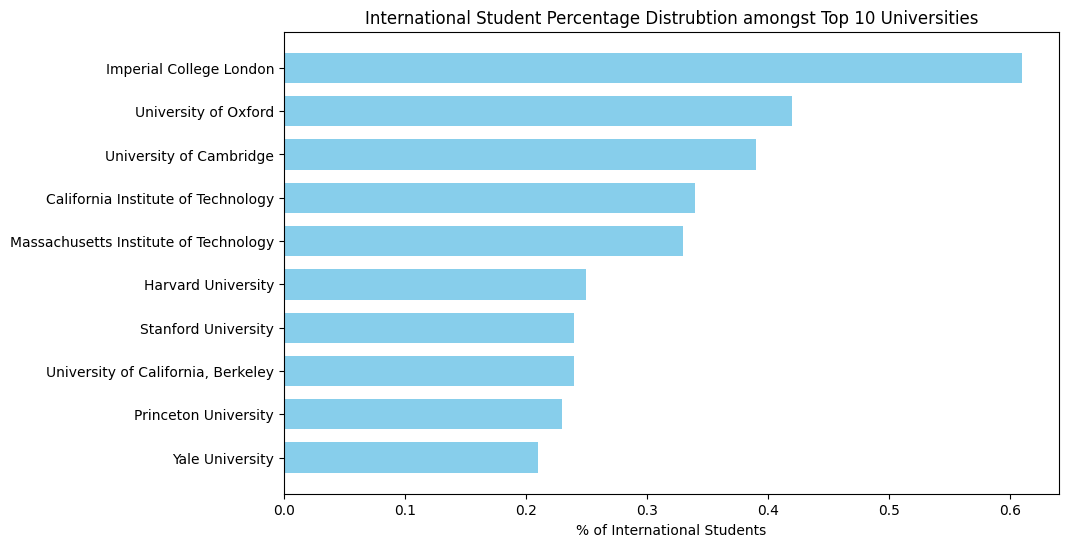

,Name of University,International Student
9,Imperial College London,0.61
0,University of Oxford,0.42
2,University of Cambridge,0.39
5,California Institute of Technology,0.34
4,Massachusetts Institute of Technology,0.33
1,Harvard University,0.25
3,Stanford University,0.24
7,"University of California, Berkeley",0.24
6,Princeton University,0.23
8,Yale University,0.21


In [27]:
# International Student % Distribution amongst the top 10 Universities (Direct Competition)
uni_sorted_int_score = uni.head(10)
top_10_int_score = uni_sorted_int_score.sort_values(by='International Student', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(top_10_int_score['Name of University'], top_10_int_score['International Student'], color='skyblue', height=0.7)
plt.xlabel('% of International Students')
plt.title('International Student Percentage Distrubtion amongst Top 10 Universities')
plt.gca().invert_yaxis()
plt.show()
top_10_int_score[['Name of University','International Student']].head(10)

## Model Preparation and Training

In [28]:
# Encoding Categorical Variables using OneHot Encoding

uni.drop(['Male', 'Female', 'No of Internation Students', 'Latitude', 'Longitude', 'University Rank'], axis = 1, inplace = True) # Have engineered features for the same already and Target is a proxy for Ranking
uni = pd.get_dummies(uni, drop_first=True)
uni.head()

,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,abs Male,...,Location_الإمارات العربية المتحدة,Location_السعودية,Location_الكويت,Location_ایران,Location_ประเทศไทย,Location_ព្រះរាជាណាចក្រ​កម្ពុជា,Location_中国,Location_日本,Location_臺灣,Location_대한민국
0,20965.0,10.6,0.42,96.4,92.3,99.7,99.0,74.9,96.2,2.0,...,0,0,0,0,0,0,0,0,0,0
1,21887.0,9.6,0.25,95.2,94.8,99.0,99.3,49.5,80.5,0.0,...,0,0,0,0,0,0,0,0,0,0
2,20185.0,11.3,0.39,94.8,90.9,99.5,97.0,54.2,95.8,3.0,...,0,0,0,0,0,0,0,0,0,0
3,16164.0,7.1,0.24,94.8,94.2,96.7,99.8,65.0,79.8,4.0,...,0,0,0,0,0,0,0,0,0,0
4,11415.0,8.2,0.33,94.2,90.7,93.6,99.8,90.9,89.3,10.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Splitting dataset
from sklearn.model_selection import train_test_split

X = uni.drop('OverAll Score', axis=1)
y = uni['OverAll Score'] # Target Variable as that decides the Ranking in the end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Training 3 different models and comparing their fit

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Decision Tree model
dt_model.fit(X_train, y_train)

# Random Forest model
rf_model.fit(X_train, y_train)

# Gradient Boosting model
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_gb = gb_model.predict(X_test)

# Model Evaluation
trainmetrics = {
    'Random Forest': {
        'MAE': mean_absolute_error(y_train, y_train_pred_rf),
        'MSE': mean_squared_error(y_train, y_train_pred_rf),
        'RMSE': mean_squared_error(y_train, y_train_pred_rf, squared=False),
        'R-squared': r2_score(y_train, y_train_pred_rf)
    },
    'Decision Tree': {
        'MAE': mean_absolute_error(y_train, y_train_pred_dt),
        'MSE': mean_squared_error(y_train, y_train_pred_dt),
        'RMSE': mean_squared_error(y_train, y_train_pred_dt, squared=False),
        'R-squared': r2_score(y_train, y_train_pred_dt)
    },
    'Gradient Boosting': {
        'MAE': mean_absolute_error(y_train, y_train_pred_gb),
        'MSE': mean_squared_error(y_train, y_train_pred_gb),
        'RMSE': mean_squared_error(y_train, y_train_pred_gb, squared=False),
        'R-squared': r2_score(y_train, y_train_pred_gb)
    }
}

testmetrics = {
    'Random Forest': {
        'MAE': mean_absolute_error(y_test, y_test_pred_rf),
        'MSE': mean_squared_error(y_test, y_test_pred_rf),
        'RMSE': mean_squared_error(y_test, y_test_pred_rf, squared=False),
        'R-squared': r2_score(y_test, y_test_pred_rf)
    },
    'Decision Tree': {
        'MAE': mean_absolute_error(y_test, y_test_pred_dt),
        'MSE': mean_squared_error(y_test, y_test_pred_dt),
        'RMSE': mean_squared_error(y_test, y_test_pred_dt, squared=False),
        'R-squared': r2_score(y_test, y_test_pred_dt)
    },
    'Gradient Boosting': {
        'MAE': mean_absolute_error(y_test, y_test_pred_gb),
        'MSE': mean_squared_error(y_test, y_test_pred_gb),
        'RMSE': mean_squared_error(y_test, y_test_pred_gb, squared=False),
        'R-squared': r2_score(y_test, y_test_pred_gb)
    }
}

# Display the results
results_train = pd.DataFrame(trainmetrics).T
results_test = pd.DataFrame(testmetrics).T

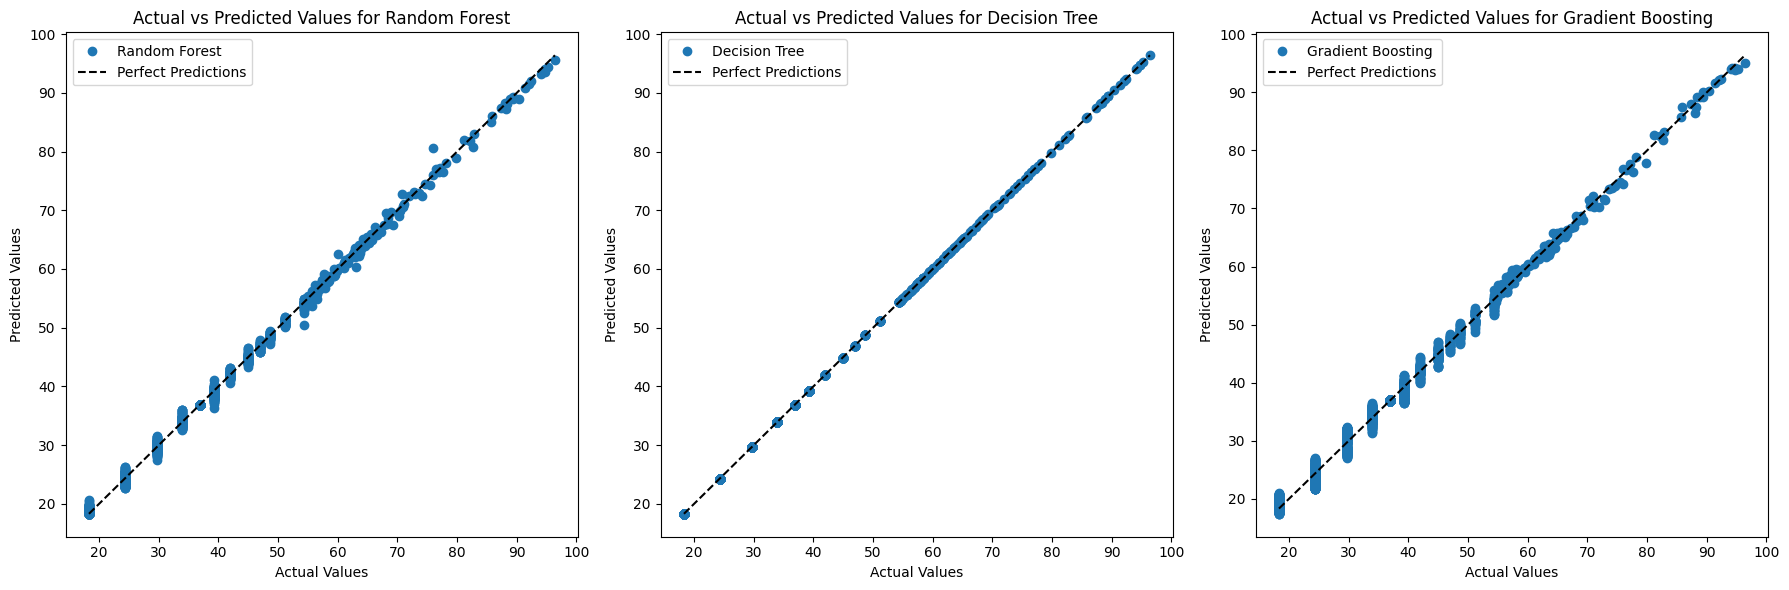

,MAE,MSE,RMSE,R-squared
Random Forest,3.831608e-01,3.812927e-01,6.174890e-01,0.997899
Decision Tree,8.301030e-15,1.823737e-28,1.350458e-14,1.000000
Gradient Boosting,7.847615e-01,1.186103e+00,1.089083e+00,0.993465


In [31]:
# Displaying Predictability of Train Set
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
def plot_actual_vs_predicted(ax, actual, predicted, model_name):
    ax.plot(actual, predicted, 'o', label=model_name)
    ax.plot([min(actual), max(actual)], [min(actual), max(actual)], '--', label='Perfect Predictions', color='black')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Actual vs Predicted Values for {model_name}')
    ax.legend()
plot_actual_vs_predicted(axes[0], y_train, y_train_pred_rf, 'Random Forest')
plot_actual_vs_predicted(axes[1], y_train, y_train_pred_dt, 'Decision Tree')
plot_actual_vs_predicted(axes[2], y_train, y_train_pred_gb, 'Gradient Boosting')
plt.tight_layout()
plt.show()
results_train

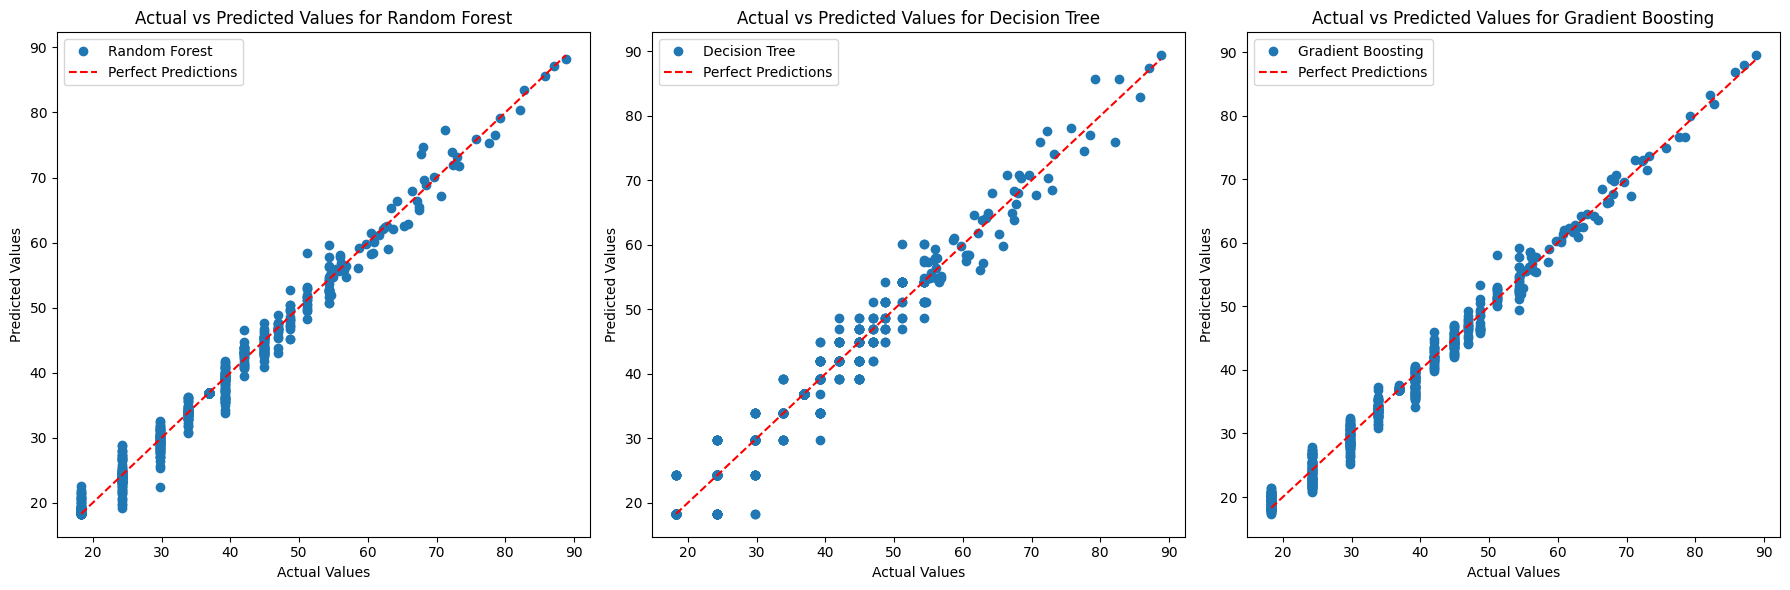

,MAE,MSE,RMSE,R-squared
Random Forest,1.008182,2.540310,1.593835,0.984161
Decision Tree,1.318220,6.174887,2.484932,0.961499
Gradient Boosting,1.024110,2.155804,1.468266,0.986558


In [32]:
# Displaying Predictability of Test Set
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
def plot_actual_vs_predicted(ax, actual, predicted, model_name):
    ax.plot(actual, predicted, 'o', label=model_name)
    ax.plot([min(actual), max(actual)], [min(actual), max(actual)], '--', label='Perfect Predictions', color='red')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Actual vs Predicted Values for {model_name}')
    ax.legend()
plot_actual_vs_predicted(axes[0], y_test, y_test_pred_rf, 'Random Forest')
plot_actual_vs_predicted(axes[1], y_test, y_test_pred_dt, 'Decision Tree')
plot_actual_vs_predicted(axes[2], y_test, y_test_pred_gb, 'Gradient Boosting')
plt.tight_layout()
plt.show()
results_test

In [33]:
# Calculating and Interpreting Cross Validation Score

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)


def rmse(scores):
    return np.sqrt(np.abs(scores))


cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cross_val_scores_dt = cross_val_score(dt_model, X, y, cv=cv, scoring='neg_mean_squared_error')
rmse_dt = rmse(-cross_val_scores_dt)
mse_dt = -cross_val_scores_dt.mean()
r2_dt = cross_val_score(dt_model, X, y, cv=cv, scoring='r2').mean()
cross_val_scores_rf = cross_val_score(rf_model, X, y, cv=cv, scoring='neg_mean_squared_error')
rmse_rf = rmse(-cross_val_scores_rf)
mse_rf = -cross_val_scores_rf.mean()
r2_rf = cross_val_score(rf_model, X, y, cv=cv, scoring='r2').mean()
cross_val_scores_gb = cross_val_score(gb_model, X, y, cv=cv, scoring='neg_mean_squared_error')
rmse_gb = rmse(-cross_val_scores_gb)
mse_gb = -cross_val_scores_gb.mean()
r2_gb = cross_val_score(gb_model, X, y, cv=cv, scoring='r2').mean()

print("Repeated Cross-Validation Results:")
print("\nRandom Forest:")
print(f"  Mean MSE: {mse_rf}")
print(f"  Mean RMSE: {rmse_rf.mean()}")
print(f"  Mean R-squared: {r2_rf}")
print("Decision Tree:")
print(f"  Mean MSE: {mse_dt}")
print(f"  Mean RMSE: {rmse_dt.mean()}")
print(f"  Mean R-squared: {r2_dt}")
print("\nGradient Boosting:")
print(f"  Mean MSE: {mse_gb}")
print(f"  Mean RMSE: {rmse_gb.mean()}")
print(f"  Mean R-squared: {r2_gb}")

Repeated Cross-Validation Results:

Random Forest:
  Mean MSE: 2.4348772233375433
  Mean RMSE: 1.5596054627769762
  Mean R-squared: 0.98594759533802
Decision Tree:
  Mean MSE: 5.9039579118985985
  Mean RMSE: 2.427111990858358
  Mean R-squared: 0.9659179543701036

Gradient Boosting:
  Mean MSE: 2.1261117844787165
  Mean RMSE: 1.4568648997004856
  Mean R-squared: 0.9877001175347097


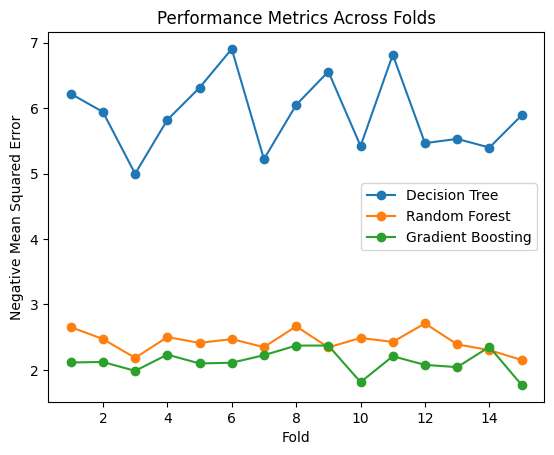

In [34]:
# Visualization for comparing Cross Validation Results for all 3 Models

import matplotlib.pyplot as plt
import numpy as np
folds = np.arange(1, len(cross_val_scores_dt) + 1)
plt.plot(folds, -cross_val_scores_dt, label='Decision Tree', marker='o')
plt.plot(folds, -cross_val_scores_rf, label='Random Forest', marker='o')
plt.plot(folds, -cross_val_scores_gb, label='Gradient Boosting', marker='o')

plt.xlabel('Fold')
plt.ylabel('Negative Mean Squared Error')
plt.title('Performance Metrics Across Folds')
plt.legend()
plt.show()

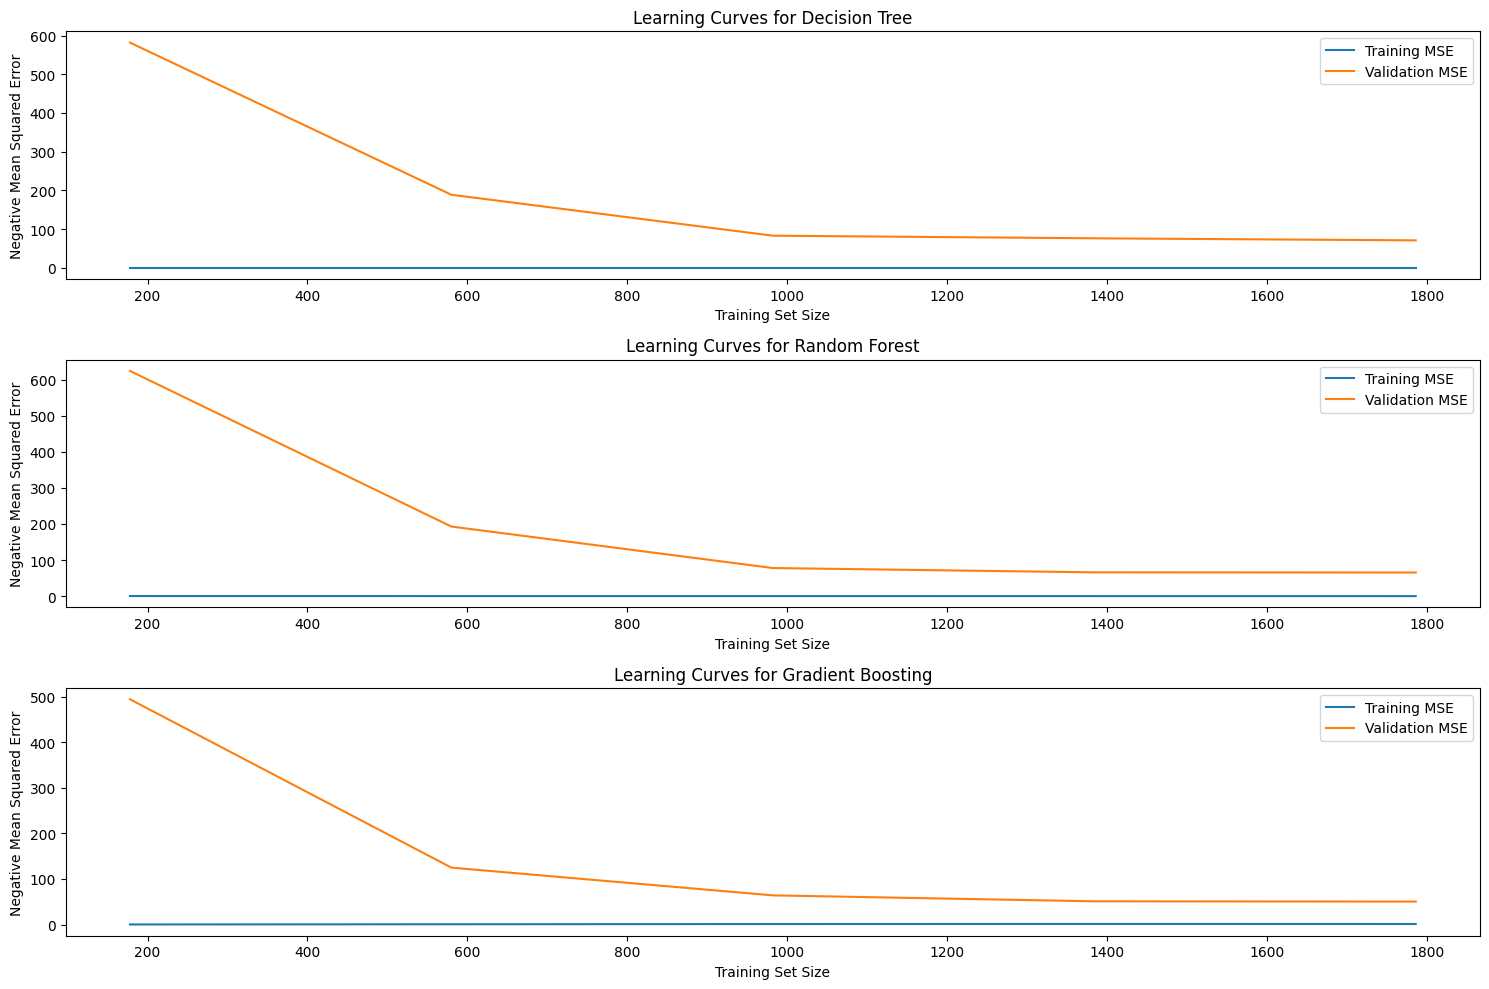

In [35]:
from sklearn.model_selection import learning_curve

train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(dt_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Generate learning curves for Random Forest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Generate learning curves for Gradient Boosting
train_sizes_gb, train_scores_gb, test_scores_gb = learning_curve(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Plot learning curves for Decision Tree
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(train_sizes_dt, -np.mean(train_scores_dt, axis=1), label='Training MSE')
plt.plot(train_sizes_dt, -np.mean(test_scores_dt, axis=1), label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curves for Decision Tree')
plt.legend()

# Plot learning curves for Random Forest
plt.subplot(3, 1, 2)
plt.plot(train_sizes_rf, -np.mean(train_scores_rf, axis=1), label='Training MSE')
plt.plot(train_sizes_rf, -np.mean(test_scores_rf, axis=1), label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curves for Random Forest')
plt.legend()

# Plot learning curves for Gradient Boosting
plt.subplot(3, 1, 3)
plt.plot(train_sizes_gb, -np.mean(train_scores_gb, axis=1), label='Training MSE')
plt.plot(train_sizes_gb, -np.mean(test_scores_gb, axis=1), label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curves for Gradient Boosting')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Gradient Boosting Feature Importance Calculation

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)
feature_importances = gb_model.feature_importances_
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cross_val_scores_gb = cross_val_score(gb_model, X, y, cv=cv, scoring='neg_mean_squared_error')
rmse_gb = np.sqrt(-cross_val_scores_gb)
mse_gb = -cross_val_scores_gb.mean()
r2_gb = cross_val_score(gb_model, X, y, cv=cv, scoring='r2').mean()

print("Repeated Cross-Validation Results:")
print("\nGradient Boosting:")
print(f"  Mean MSE: {mse_gb}")
print(f"  Mean RMSE: {rmse_gb.mean()}")
print(f"  Mean R-squared: {r2_gb}")
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"  {feature}: {importance}")

Repeated Cross-Validation Results:

Gradient Boosting:
  Mean MSE: 2.1261117844787165
  Mean RMSE: 1.4568648997004856
  Mean R-squared: 0.9877001175347097

Feature Importances:
  No of student: 0.0001529872741340842
  No of student per staff: 4.733132853343412e-05
  International Student: 0.0011178278647629141
  Teaching Score: 0.05841750565948072
  Research Score: 0.5843421135043687
  Citations Score: 0.3399988067529519
  Industry Income Score: 0.00013500577542819816
  International Outlook Score: 0.014831277776408724
  abs Male: 0.00010576448619508285
  Name of University_AGH University of Krakow: 0.0
  Name of University_Aalborg University: 0.0
  Name of University_Aalto University: 0.0
  Name of University_Aarhus University: 0.0
  Name of University_Abdelmalek Essaâdi University: 0.0
  Name of University_Abdul Wali Khan University Mardan: 0.0
  Name of University_Abdullah Gül University: 0.0
  Name of University_Abertay University: 0.0
  Name of University_Aberystwyth University: 0

In [44]:
# Grouping the Categorical Variable Importance again to Calculate the Importance of Location and University Name on our Target Variable i.e. Overall Score

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)
feature_importances = gb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
categorical_importance = importance_df.groupby(X.columns.str.split('_').str[0])['Importance'].mean()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cross_val_scores_gb = cross_val_score(gb_model, X, y, cv=cv, scoring='neg_mean_squared_error')
rmse_gb = np.sqrt(-cross_val_scores_gb)
mse_gb = -cross_val_scores_gb.mean()
r2_gb = cross_val_score(gb_model, X, y, cv=cv, scoring='r2').mean()

pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("Repeated Cross-Validation Results:")
print("\nGradient Boosting:")
print(f"  Mean MSE: {mse_gb_str}")
print(f"  Mean RMSE: {rmse_gb_mean_str}")
print(f"  Mean R-squared: {r2_gb_str}")
print("\nCategorical Feature Importances:")
print(categorical_importance)

Repeated Cross-Validation Results:

Gradient Boosting:
  Mean MSE: 2.1261
  Mean RMSE: 1.4569
  Mean R-squared: 0.9877

Categorical Feature Importances:
Citations Score               0.3400
Industry Income Score         0.0001
International Outlook Score   0.0148
International Student         0.0011
Location                      0.0000
Name of University            0.0000
No of student                 0.0002
No of student per staff       0.0000
Research Score                0.5843
Teaching Score                0.0584
abs Male                      0.0001
Name: Importance, dtype: float64
